<a href="https://colab.research.google.com/github/AyeSL/Spotify.DataScience/blob/main/SanchezLuayzaAyelenDesafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de canciones de Spotify**

## **Abstract:**
El presente estudio se enfoca en analizar un dataset de Spotify que contiene información sobre canciones, incluyendo características como el artista, la pista, el álbum, la popularidad y diversas métricas de audio. El objetivo es utilizar técnicas de data science para explorar y comprender los patrones y tendencias presentes en estos datos. Mediante el análisis de estas características, se busca obtener información valiosa que pueda contribuir tanto al ámbito académico como al comercial, proporcionando una visión detallada del comportamiento de las canciones en la plataforma de Spotify.

## **Objetivo general:**
El objetivo general de este estudio es analizar y comprender el dataset de Spotify, identificando patrones y tendencias en los datos relacionados con las canciones. Se busca obtener información relevante sobre las características de las canciones, así como su relación con la popularidad y el rendimiento en la plataforma.

## **Objetivo comercial:**
El objetivo comercial de este estudio es utilizar el análisis de datos para obtener información útil y estratégica que pueda beneficiar a las empresas y profesionales de la industria musical. A través del análisis de las características de las canciones y su relación con la popularidad, se busca identificar factores clave que impulsen el éxito de una canción en Spotify. Esto permitirá a las discográficas, artistas y profesionales de la música tomar decisiones más informadas en cuanto a la producción, promoción y distribución de canciones, maximizando su potencial de alcance y rentabilidad.
A su vez se busca identificar características que permitan clasificar y armar listas con canciones que compartan características similares. Por ejemplo: "Para bailar", "Para relajarse", "Para andar en auto", etc.
La suscripción de los usuarios a las listas, les permite obtener mas likes, comentarios, reproducciones, lo cual hace una canción "más exitosa".


## **Contexto comercial:**
El conocimiento de las características que influyen en la popularidad y el éxito de una canción puede ayudar a los profesionales de la música a tomar decisiones estratégicas más efectivas. Al comprender las preferencias de los usuarios y los factores que generan mayor interacción, las discográficas pueden ajustar sus estrategias de marketing y promoción, aumentando así las posibilidades de alcanzar audiencias más amplias y obtener un mejor rendimiento comercial.



##**Hipótesis planteadas:**
El estudio de este dataset se dirige a responder algunas hipótesis como:
* ¿Qué Artistas tienen más Likes en la plataforma de Spotify? La primera hipótesis es que entre los artistas estarán al menos 2 artistas que dirigen su música a las nuevas generaciones (trap, coreano, pop).
* ¿Existe una correlación entre la cantidad de Likes y Vistas de un artista? ¿Será que una relación directamente proporcional?
* ¿Puede determinarse cuál es el Album que prefieren la audiencia? ¿Sera de los artistas con más vistas?

**Queda determinar:**
* ¿Puede realizarse una segmentación de la audiencia según el género musical elegido?
* ¿Como es la progresion en el tiempo, o en diferentes trabajos discográficos, de los artistas con más vistas?
* ¿Pueden determinarse algunas caracteristicas que hagan que algunas canciones sean más populares?






In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_1 = pd.read_csv("/content/drive/MyDrive/Coderhouse. Data Science/Desafios/Spotify_Youtube.csv.zip")


In [4]:
df_1.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
df_1.columns


Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [6]:
likes_artistas = df_1.groupby('Artist').agg({"Likes": "sum"}).reset_index().sort_values('Likes', ascending=False)
views_artistas = df_1.groupby('Artist').agg({"Views": "sum"}).reset_index().sort_values('Views', ascending=False)

In [7]:
likes_artistas = likes_artistas.head(5)
colores = ['orange', 'green', 'blue', 'yellow', 'purple']

Text(0, 0.5, 'Cantidad de likes')

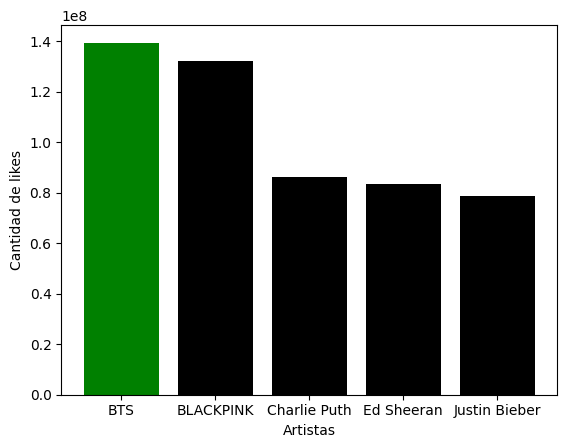

In [8]:
likes_artistas = likes_artistas.head(5)
colores2 = ['green', 'black', 'black', 'black', 'black']
fig, ax =plt.subplots()
mapeo_colores = ax.bar(likes_artistas['Artist'], likes_artistas['Likes'], color=colores2)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de likes')



Text(0.5, 1.0, 'Artistas con más likes')

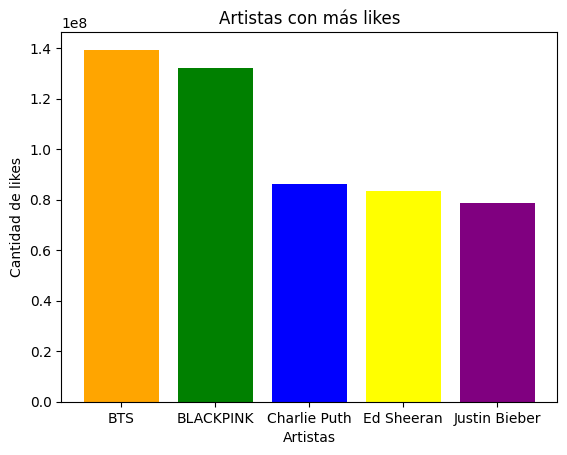

In [9]:
fig, ax =plt.subplots()
mapeo_colores = ax.bar(likes_artistas['Artist'], likes_artistas['Likes'], color=colores)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de likes')
plt.title('Artistas con más likes')



In [10]:

views_artistas = views_artistas.head(5)
color2 = ['purple', 'yellow', 'blue','orange', 'green' ]



Text(0.5, 1.0, 'Artistas con más vistas')

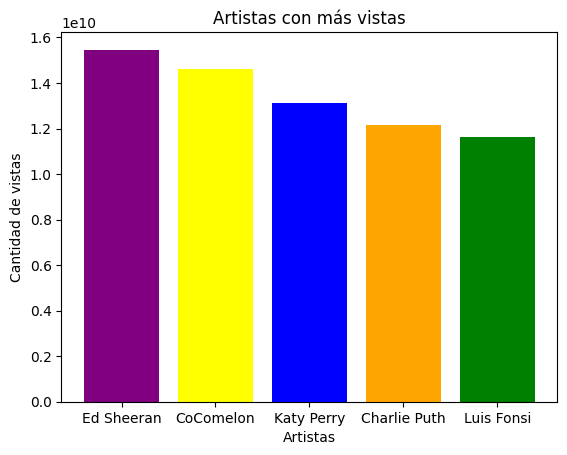

In [11]:
fig, ax =plt.subplots()
mapeo_v = ax.bar(views_artistas['Artist'], views_artistas['Views'],color = color2)

plt.xlabel('Artistas')
plt.ylabel('Cantidad de vistas')
plt.title('Artistas con más vistas')



Text(0.5, 1.0, 'Artistas con más vistas')

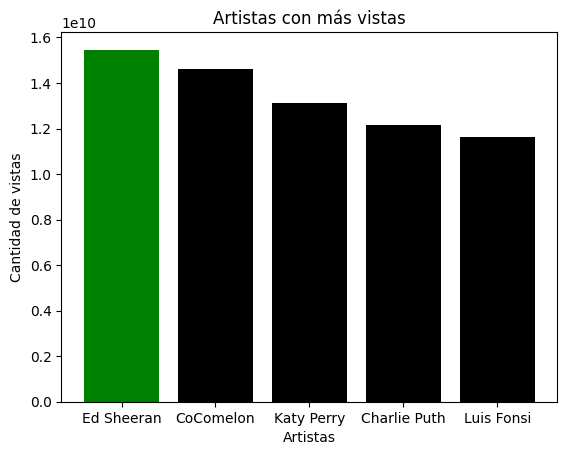

In [12]:
fig, ax =plt.subplots()
mapeo_v = ax.bar(views_artistas['Artist'], views_artistas['Views'],color = colores2)

plt.xlabel('Artistas')
plt.ylabel('Cantidad de vistas')
plt.title('Artistas con más vistas')

Text(0, 0.5, 'Likes')

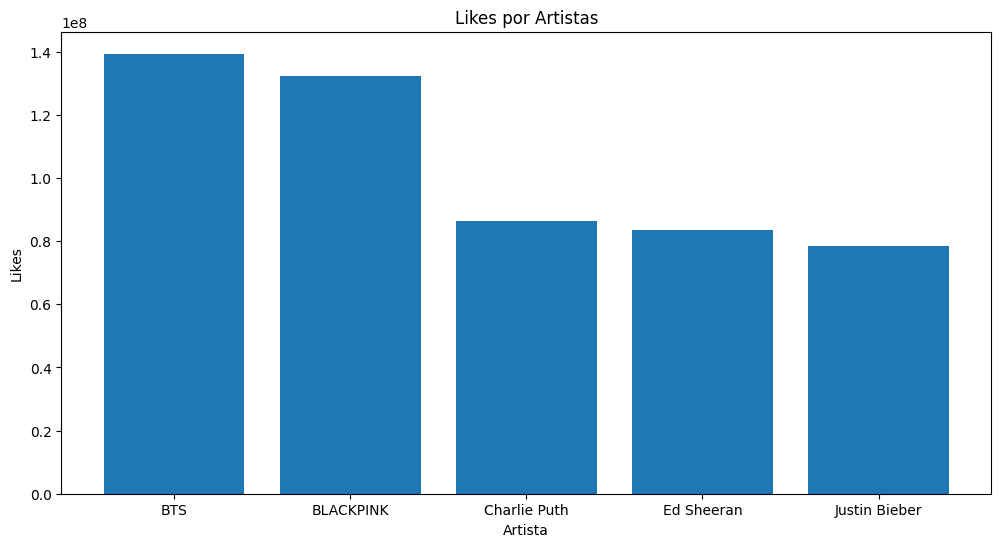

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(likes_artistas['Artist'],likes_artistas['Likes'])
ax.set_title('Likes por Artistas')
ax.set_xlabel('Artista')
ax.set_ylabel('Likes')

In [14]:
likes_album = df_1.groupby('Album').agg({"Likes": "sum"}).reset_index().sort_values('Likes', ascending=False)

In [15]:
likes_album = likes_album.head(5)

Text(0, 0.5, 'Likes')

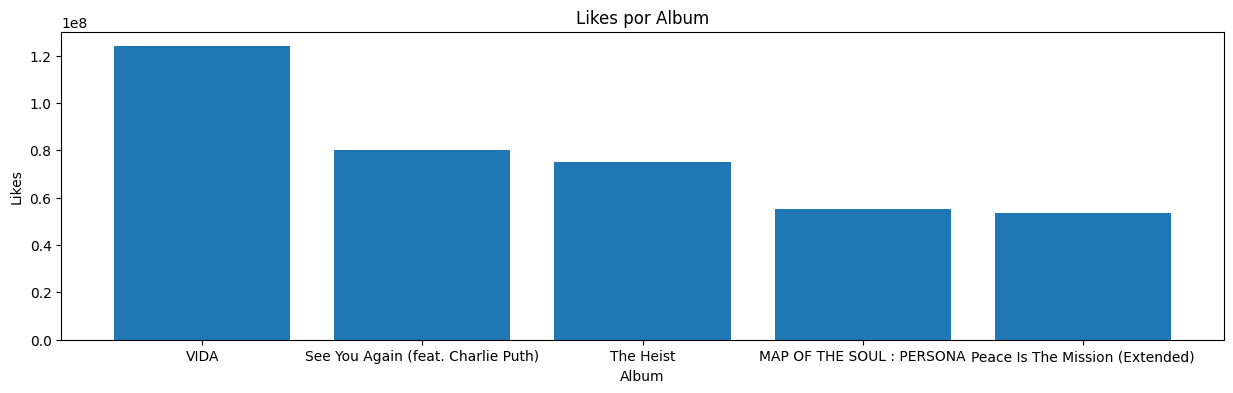

In [16]:
fig, ax =plt.subplots(figsize=(15, 4))
mapeo3 = ax.bar(likes_album['Album'], likes_album['Likes'])
ax.set_title('Likes por Album')
ax.set_xlabel('Album')
ax.set_ylabel('Likes')


<Axes: xlabel='Artist', ylabel='Likes'>

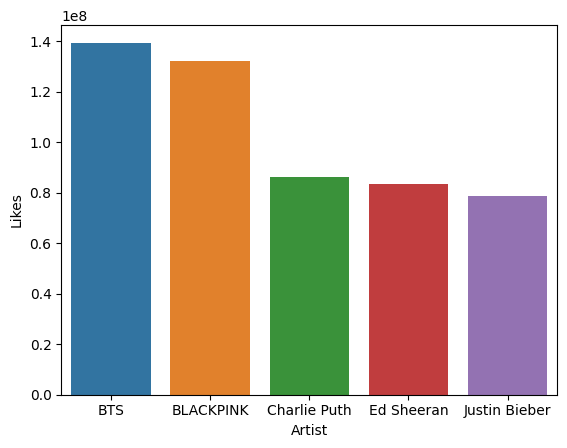

In [17]:
sns.barplot(data=likes_artistas, x="Artist", y="Likes")



En los gráficos no se ve una clara tendencia en donde los artistas con más likes, sean los más comentados.
Tampoco tiene relación directa el artista con más likes con el álbum que tiene mayor favoritismo.
Debería verificarse si pertencen a un género especifico las canciones más exitosa




In [18]:
df_1 = df_1.set_index("Artist")

In [19]:
df_1

,Unnamed: 0,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
Artist,,,,,,,,,,,,,,,,,,,,,
Gorillaz,0,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
Gorillaz,1,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
Gorillaz,2,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
Gorillaz,3,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
Gorillaz,4,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SICK LEGEND,20713,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
SICK LEGEND,20714,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
SICK LEGEND,20715,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06


In [20]:
df_recorte = df_1.drop(columns=["Url_youtube","Description","Licensed","official_video","Uri","Speechiness",
       "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo",
       "Duration_ms", "Channel", "Stream","Url_spotify","Key","Loudness","Unnamed: 0","Album_type"])

In [21]:
df_recorte

,Track,Album,Danceability,Energy,Title,Views,Likes,Comments
Artist,,,,,,,,
Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0
Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0
Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0
Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0
Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0
...,...,...,...,...,...,...,...,...
SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0.582,0.926,JUST DANCE HARDSTYLE,71678.0,1113.0,0.0
SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,0.531,0.936,SET FIRE TO THE RAIN HARDSTYLE,164741.0,2019.0,0.0
SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,0.443,0.830,OUTSIDE HARDSTYLE SPED UP,35646.0,329.0,0.0


In [22]:
#  ponderación para los likes
factor_likes = 2

# Calcular la  popularidad ponderada, teniendo en cuenta likes, views y comentarios

df_recorte['Popularidad'] = (df_recorte['Likes'] * factor_likes) + df_recorte['Views'] + df_recorte['Comments']
df_recorte


,Track,Album,Danceability,Energy,Title,Views,Likes,Comments,Popularidad
Artist,,,,,,,,,
Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,706166920.0
Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,74200904.0
Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,9006738.0
Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,215387335.0
Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,631031524.0
...,...,...,...,...,...,...,...,...,...
SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0.582,0.926,JUST DANCE HARDSTYLE,71678.0,1113.0,0.0,73904.0
SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,0.531,0.936,SET FIRE TO THE RAIN HARDSTYLE,164741.0,2019.0,0.0,168779.0
SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,0.443,0.830,OUTSIDE HARDSTYLE SPED UP,35646.0,329.0,0.0,36304.0


In [23]:
 #Separar la variable independiente (X) y la variable dependiente (Y)
X = df_recorte["Title"]
y = df_recorte["Popularidad"]




In [24]:
#eliminar filas con datos ausentes
#Revisando estructura del df
df_recorte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20718 entries, Gorillaz to SICK LEGEND
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         20718 non-null  object 
 1   Album         20718 non-null  object 
 2   Danceability  20716 non-null  float64
 3   Energy        20716 non-null  float64
 4   Title         20248 non-null  object 
 5   Views         20248 non-null  float64
 6   Likes         20177 non-null  float64
 7   Comments      20149 non-null  float64
 8   Popularidad   20100 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.6+ MB


In [25]:
df_recorte.dropna(axis=0, how="any", inplace=True)

In [26]:
print(df_recorte.shape)

(20099, 9)


In [27]:
df_recorte.info()   #verifico si quedo algun nulo

<class 'pandas.core.frame.DataFrame'>
Index: 20099 entries, Gorillaz to SICK LEGEND
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         20099 non-null  object 
 1   Album         20099 non-null  object 
 2   Danceability  20099 non-null  float64
 3   Energy        20099 non-null  float64
 4   Title         20099 non-null  object 
 5   Views         20099 non-null  float64
 6   Likes         20099 non-null  float64
 7   Comments      20099 non-null  float64
 8   Popularidad   20099 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [28]:
#y = df_recorte["Popularidad"]
#X = df_recorte.drop(columns=["Artist", "Popularidad"])

In [29]:
# Crear y entrenar el modelo de regresión lineal
#modelo_arbol = DecisionTreeClassifier()
#modelo_arbol.fit (X, y)



In [30]:
# Hacer predicciones
#y_pred = modelo_arbol.predict(X)



DATA WRANGLING


In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20718 entries, Gorillaz to SICK LEGEND
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null

In [32]:
df_recorte.info()  ##verifico presencia de nulos en las columnas que selecciono para el analisis

<class 'pandas.core.frame.DataFrame'>
Index: 20099 entries, Gorillaz to SICK LEGEND
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         20099 non-null  object 
 1   Album         20099 non-null  object 
 2   Danceability  20099 non-null  float64
 3   Energy        20099 non-null  float64
 4   Title         20099 non-null  object 
 5   Views         20099 non-null  float64
 6   Likes         20099 non-null  float64
 7   Comments      20099 non-null  float64
 8   Popularidad   20099 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [33]:
df_recorte.head()

,Track,Album,Danceability,Energy,Title,Views,Likes,Comments,Popularidad
Artist,,,,,,,,,
Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,706166920.0
Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,74200904.0
Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,9006738.0
Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,215387335.0
Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,631031524.0


In [34]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['Danceability'], **{})
chart

NameError: ignored

In [ ]:
#duplicados
dups = df_recorte.duplicated(subset= "Artist", keep: False)
df_2=df_recorte.loc[dups].sort_values(by="Artist")

Link a la presentación PPT:
https://docs.google.com/presentation/d/1KJLDLuIb-Nhun7IYLgryp_6V1AZMcdJ5y8LQH6bItIs/edit?usp=sharing